## Description:
__Context:__
Predict next-day rain by training classification models on the target variable RainTomorrow.

__Content:__
This dataset contains about 10 years of daily weather observations from many locations across Australia.

__Business Goal:__

Main objective of the analysis is to focus on prediction of value of the __RainTomorrow__  .

__RainTomorrow__ is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Source & Acknowledgements
Observations were drawn from numerous weather stations. The daily observations are available from [link](http://www.bom.gov.au/climate/data).
An example of latest weather observations in Canberra:[link](http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml)

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source:[source](http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data).

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

## Introduction




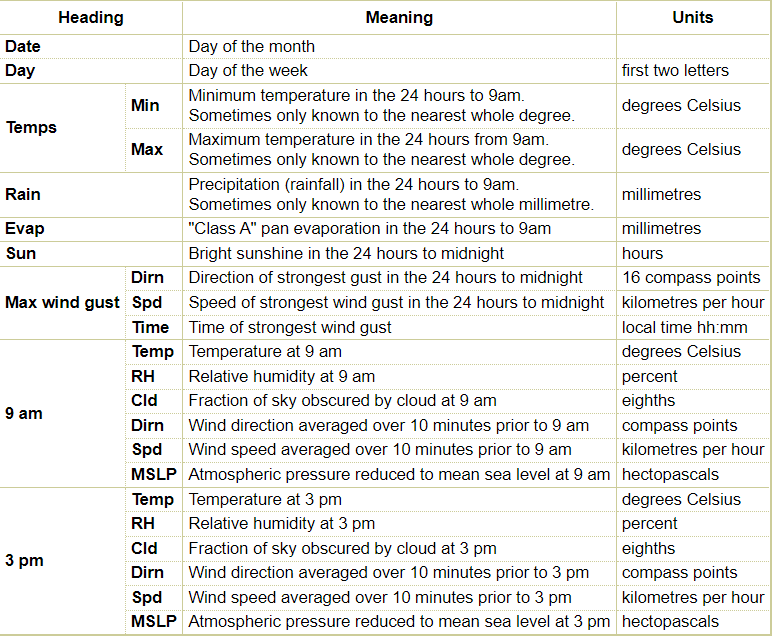



* We will be using the wetherAus data from kaggle.

* We have 23 columns including targer variable .

* This a problem of clasifiaiton binary .

* We will use a diferent model of clasification (logistic reg,Knn,svm,boosting) and compar them .

* we will use oversampling technique .
 



# Exploratory Data Analysis

* Import library and the csv file and examine its contents.
* Output summary statistics and check variable data types
* Check missing values 
* check the correlation between variables one one hand and with the target 

### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import os, sys
import seaborn as sns

########

from sklearn.model_selection import StratifiedShuffleSplit ,GridSearchCV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, roc_auc_score
from sklearn.kernel_approximation import Nystroem
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

#### Preparing data

In [2]:
data= pd.read_csv('weatherAUS.csv')


In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


We have 145460 rows and 23 columns

In [4]:
data.shape

(145460, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null


#### Values of the Target 

* As we see we have a signicative inbalanced classes
*We have more chance the not rain then rain . 
No -> 110316/145460 = 75%
Yes -> 31877/145460 = 21.91%

In [3]:
data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

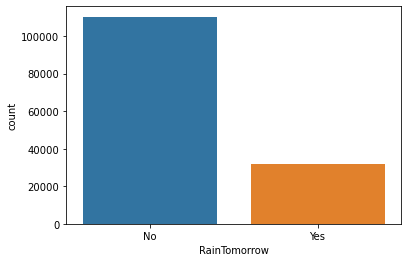

In [4]:
plt.figure()
sns.countplot(x=data.RainTomorrow)
plt.show()

In [5]:
data.describe().T.round(2)
#Rainfall have a outliers 

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.19,6.40,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.22,7.12,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.36,8.48,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.47,4.19,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.61,3.79,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.04,13.61,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.04,8.92,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.66,8.81,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.88,19.03,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.54,20.80,0.0,37.0,52.0,66.0,100.0


In [6]:
data.describe(include='object')

#we can to transform Date to datetime because is not object


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


#### Identifying the number of unique values each variable

In [7]:
a=pd.Series(data.dtypes)
b=pd.Series(data.nunique())

In [8]:
pd.concat([a,b],axis=1).rename(columns={0:'Type',1:'unique_values'})


,Type,unique_values
Date,object,3436
Location,object,49
MinTemp,float64,389
MaxTemp,float64,505
Rainfall,float64,681
Evaporation,float64,358
Sunshine,float64,145
WindGustDir,object,16
WindGustSpeed,float64,67
WindDir9am,object,16


In [9]:
df_unique=pd.concat([a,b],axis=1).rename(columns={0:'Type',1:'unique_values'})

#### Check for missing values 
* Evaporation,Sunshine.Cloud3pm  have more the 40% of missing values ,then is good to drop them
* The target have 2.2% of misisng values the we will  drop rows contains nan i the target

In [10]:
round(data.isnull().sum()/len(data)*100,2)

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
Evaporation      43.17
Sunshine         48.01
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Cloud3pm         40.81
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
dtype: float64

# Feature engineiring 
* Handle missing values (drop and fill Nan data)
* Separate the variables into numerical and categorical
* Calculate the correlation between numerical vars before filling Nan 
* Detect outliers and fill de Nan values with mean,median,moda

__Drop the columns where more than 25% of the data is missing.__

In [11]:
NanDf=(round(data.isnull().sum()/len(data)*100,2)).to_frame().rename(columns={0:'missing'})

In [12]:
NanDf

,missing
Date,0.00
Location,0.00
MinTemp,1.02
MaxTemp,0.87
Rainfall,2.24
Evaporation,43.17
Sunshine,48.01
WindGustDir,7.10
WindGustSpeed,7.06
WindDir9am,7.26


In [15]:
list(NanDf[NanDf['missing']>=25].index)


['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [16]:
list_drop=list(NanDf[NanDf['missing']>=25].index)
data.drop(list_drop,axis=1,inplace=True)

In [17]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [18]:
#RainTomorrow drop nan rows
data.dropna(subset=['RainTomorrow'],inplace=True)

In [20]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

#### Now we have to divide our data into categories and numbers
* first we transform Date to datetime
* Binary variables and rest of categories , numerical variables


In [21]:
data.Date.dtype

dtype('O')

In [22]:
data['Date']=pd.to_datetime(data['Date'])

In [23]:
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data.drop(columns='Date',inplace=True)

In [24]:
binary_var = list(df_unique[df_unique['unique_values']==2].index)
binary_var

['RainToday', 'RainTomorrow']

In [25]:
categorical_variables =list(data.select_dtypes(include='object'))
categorical_variables 

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [26]:
categorical_variables = list(set(categorical_variables) - set(binary_var))
categorical_variables 

['WindDir3pm', 'WindDir9am', 'Location', 'WindGustDir']

In [27]:
numerical_vars = list(set(data.columns)-set(categorical_variables)-set(binary_var))
numerical_vars 

['MaxTemp',
 'Temp9am',
 'Month',
 'Temp3pm',
 'WindSpeed3pm',
 'WindGustSpeed',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'WindSpeed9am',
 'Year',
 'Rainfall',
 'MinTemp',
 'Humidity9am']

In [ ]:
#numerical_vars.remove('Date')

### filling missing values
* Binary variables
* Categorical variables
* Numerical variables

__Binary variables__

In [28]:
data[binary_var].isnull().sum()

RainToday       1406
RainTomorrow       0
dtype: int64

In [29]:
data.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [33]:
data.RainToday.mode()[0]

'No'

we can see that raintoday and rainfall have some relationship because they contain the same number of nan
When we scale our data, perhaps we will see the relationship between this two variables

In [34]:
data.Rainfall.isnull().sum()

1406

In [32]:
data[data['RainToday'].isnull()]['Rainfall']

15       NaN
284      NaN
436      NaN
438      NaN
444      NaN
          ..
144938   NaN
144951   NaN
144956   NaN
145093   NaN
145336   NaN
Name: Rainfall, Length: 1406, dtype: float64

In [35]:
data['RainToday'].fillna(data['RainToday'].mode()[0],inplace=True)

In [36]:
data[binary_var].isnull().sum()

RainToday       0
RainTomorrow    0
dtype: int64

__Categorical variables__

In [37]:
data[categorical_variables].isnull().sum()

WindDir3pm      3778
WindDir9am     10013
Location           0
WindGustDir     9330
dtype: int64

In [42]:
print("Mode of WindDir3pm is ",data.WindDir3pm.mode()[0])
print()
print(data.WindDir3pm.value_counts())


Mode of WindDir3pm is  SE

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64


In [37]:
data.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [38]:
data.WindDir9am.value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [43]:
for cat in categorical_variables:
    data[cat].fillna(data[cat].mode()[0],inplace=True)

In [44]:
data[categorical_variables].isnull().sum()

WindDir3pm     0
WindDir9am     0
Location       0
WindGustDir    0
dtype: int64

__Numerical variables__

In [45]:
data[numerical_vars].isnull().sum()

MaxTemp            322
Temp9am            904
Month                0
Temp3pm           2726
WindSpeed3pm      2630
WindGustSpeed     9270
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
WindSpeed9am      1348
Year                 0
Rainfall          1406
MinTemp            637
Humidity9am       1774
dtype: int64

- Before doing any data filling in the numerical values, first we are going to see the correlation between these variables to see if we can precede any one

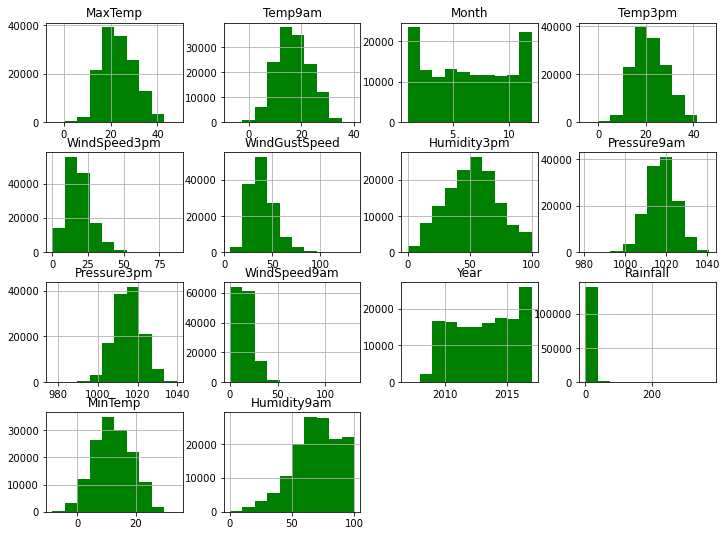

In [46]:
# we draw the distributon
# some vars are skewed right and left
data[numerical_vars].hist(color='green', figsize=(12, 9))
plt.show()

In [51]:
#data[numerical_vars].corr().stack().to_frame().reset_index() \
#.rename(columns={'level_0':'var1','level_1':'var2',0:'correlation'})

In [47]:
corr_values = data[numerical_vars].corr()

# Simplify by emptying all the data below the diagonal

#np.tril_indices_from ->Return the indices for the lower-triangle of arr
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

Correlation between numerical variable:

In [54]:
corr_values.sort_values(by='abs_correlation',ascending=False).query('abs_correlation > 0.65')

,feature1,feature2,correlation,abs_correlation
2,MaxTemp,Temp3pm,0.984562,0.984562
70,Pressure9am,Pressure3pm,0.961348,0.961348
23,Temp9am,MinTemp,0.901813,0.901813
0,MaxTemp,Temp9am,0.887020,0.887020
14,Temp9am,Temp3pm,0.860574,0.860574
11,MaxTemp,MinTemp,0.736267,0.736267
44,Temp3pm,MinTemp,0.708865,0.708865
46,WindSpeed3pm,WindGustSpeed,0.686419,0.686419
69,Humidity3pm,Humidity9am,0.667388,0.667388


As we can see there are highly correlated variables, we will proceed to eliminate Temp3pm, Temp9am, Pressure9am


In [55]:
data.drop(columns=['Temp3pm','Temp9am','Pressure9am'],inplace=True)

In [56]:
lista=['Temp3pm','Temp9am','Pressure9am']
for i in lista:
        numerical_vars.remove(i)


In [57]:
numerical_vars


['MaxTemp',
 'Month',
 'WindSpeed3pm',
 'WindGustSpeed',
 'Humidity3pm',
 'Pressure3pm',
 'WindSpeed9am',
 'Year',
 'Rainfall',
 'MinTemp',
 'Humidity9am']

In [58]:
data[numerical_vars].isnull().sum()

MaxTemp            322
Month                0
WindSpeed3pm      2630
WindGustSpeed     9270
Humidity3pm       3610
Pressure3pm      13981
WindSpeed9am      1348
Year                 0
Rainfall          1406
MinTemp            637
Humidity9am       1774
dtype: int64

Before we see if the data have outliers or not to know if we will fill the Nan with mean or median

__Outlieres__

* Except humidity3pm all variables have outliers
* filling missing values 

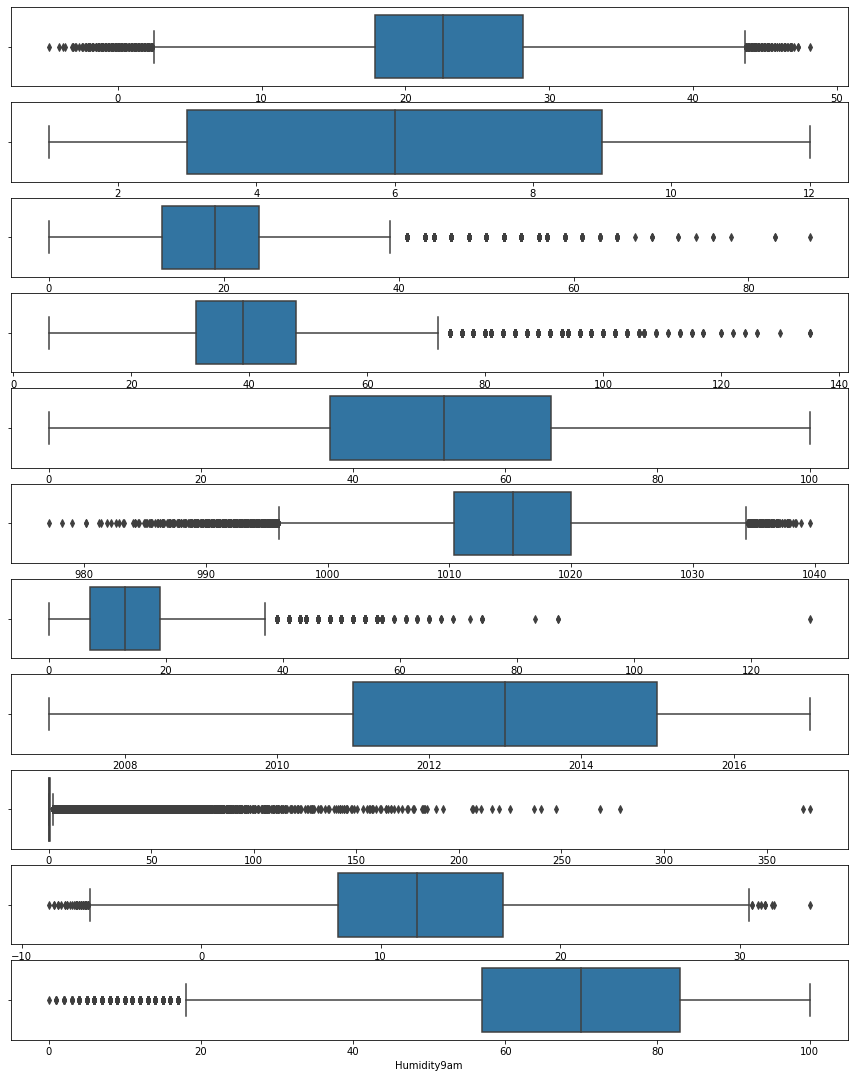

In [59]:
fig,ax=plt.subplots(figsize=(15,19),nrows=len(numerical_vars),ncols=1)
i=0
for col in numerical_vars:
    sns.boxplot(data=data[numerical_vars],x=col,ax=ax[i])
    i=i+1



In [60]:
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)

In [61]:

for num in numerical_vars:
    
    data[num].fillna(data[num].median(),inplace=True)

In [62]:
data[numerical_vars].isnull().sum()

MaxTemp          0
Month            0
WindSpeed3pm     0
WindGustSpeed    0
Humidity3pm      0
Pressure3pm      0
WindSpeed9am     0
Year             0
Rainfall         0
MinTemp          0
Humidity9am      0
dtype: int64

In [63]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
Month            0
Year             0
dtype: int64

In [64]:
#Clean dataset
data.to_csv('Rain_australia.csv',index=False)

## Categorical data transformation

* Using LabelEncoder,LabelBinarizer
* Save dataset
* 


In [65]:
data=pd.read_csv('Rain_australia.csv')
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,Month,Year
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,No,No,12,2008
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,No,No,12,2008
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,No,No,12,2008
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,No,No,12,2008
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,No,No,12,2008


In [66]:
data[categorical_variables].nunique()

WindDir3pm     16
WindDir9am     16
Location       49
WindGustDir    16
dtype: int64

In [67]:
data.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [68]:
data.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

__I have decided to use label encoder instead of onehotencoder, because first to avoid multicoleanility and so that our dataset does not grow too much, also the variables seem to have an order for example of city or north south west etc.__

In [69]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

lb=LabelBinarizer()
le=LabelEncoder()

for k in binary_var:
    data[k]= lb.fit_transform(data[k])
    


In [70]:
for j in categorical_variables:
    data[j]= le.fit_transform(data[j])    

### we must scale data 

In [71]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [72]:
for column in [categorical_variables + numerical_vars]:
    data[column] = mm.fit_transform(data[column])

In [73]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Location,142193.0,0.49,0.30,0.0,0.23,0.50,0.75,1.0
MinTemp,142193.0,0.49,0.15,0.0,0.38,0.48,0.60,1.0
MaxTemp,142193.0,0.53,0.13,0.0,0.43,0.52,0.62,1.0
Rainfall,142193.0,0.01,0.02,0.0,0.00,0.00,0.00,1.0
WindGustDir,142193.0,0.54,0.31,0.0,0.27,0.60,0.87,1.0
WindGustSpeed,142193.0,0.26,0.10,0.0,0.19,0.26,0.31,1.0
WindDir9am,142193.0,0.47,0.30,0.0,0.20,0.47,0.73,1.0
WindDir3pm,142193.0,0.52,0.30,0.0,0.27,0.53,0.80,1.0
WindSpeed9am,142193.0,0.11,0.07,0.0,0.05,0.10,0.15,1.0
WindSpeed3pm,142193.0,0.21,0.10,0.0,0.15,0.22,0.28,1.0


In [75]:
data.to_csv('clean_Rain_austrialia.csv',index=False)

# Split the data

* Now that the data are encoded and scaled, separate the features (X) from the target (y, RainTomorrow).
* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.


In [7]:
import pickle

In [2]:
data=pd.read_csv('clean_Rain_austrialia.csv')

In [3]:
data.RainTomorrow.value_counts(normalize=True)

0    0.775819
1    0.224181
Name: RainTomorrow, dtype: float64

In [4]:
feature_cols =  [x for x in data.columns  if  x not in 'RainTomorrow']

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols],data.RainTomorrow))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'RainTomorrow']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'RainTomorrow']

In [5]:
y_train.value_counts(normalize=True)

0    0.775818
1    0.224182
Name: RainTomorrow, dtype: float64

In [6]:
y_test.value_counts(normalize=True)

0    0.775822
1    0.224178
Name: RainTomorrow, dtype: float64

# Logistic Regresion
* without regularization 
* with regularization penalty (l1,l2)
* compare accuracy ,precision,

In [82]:

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [84]:

pkl_filename='logisticRegression.pkl'
with open(pkl_filename,'wb') as file:
    pickle.dump(lr,file)

In [83]:
lr_l1=LogisticRegressionCV(cv=4,solver='liblinear',penalty='l1')
lr_l1.fit(X_train,y_train)

LogisticRegressionCV(cv=4, penalty='l1', solver='liblinear')

In [85]:

pkl_filename='lr_l1Cv.pkl'
with open(pkl_filename,'wb') as file:
    pickle.dump(lr_l1,file)

In [44]:
with open ('lr_l1Cv.pkl','rb') as file :
    lr_l1=pickle.load(file)

In [9]:
with open ('logisticRegression.pkl','rb') as file :
    lr=pickle.load(file)

In [18]:
pred_train=lr.predict(X_train)
score_train=accuracy_score(pred_train,y_train)
pred_test=lr.predict(X_test)
score_test=accuracy_score(pred_test,y_test)
print(f"score_tarin:{score_train}")
print(f"score_test:{score_test}")

score_tarin:0.8378057969558447
score_test:0.841225561442168


In [24]:
#write metrics to.txxt
with open('metricas.txt','w') as file:
    file.write(f"Training accuracy :{score_train}\n")
    file.write(f"Test accuracy :{score_test}\n")

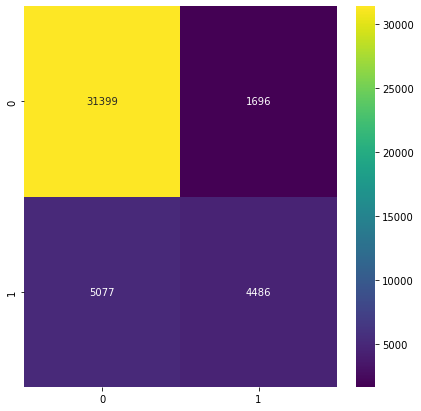

In [55]:
plt.figure(figsize=(7,7))
cm=confusion_matrix(y_test,pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.savefig('logistic.png',dpi=80)

 __Compare models__


In [45]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score as score

pred_list=[]

model=[lr,lr_l1]
label=['lr','lr_l1']

for lab,mod in zip(label,model):
        pred_list.append(pd.Series(mod.predict(X_test),name=lab))
        
   # metric_list.append(pd.Series(accuracy_score(y_test,mod.predict(X_test)),name=lab))
   # metric_list.append(pd.Series(precision_score(y_test,mod.predict(X_test)),name=lab))
    
    

pred_list = pd.concat(pred_list, axis=1)  


pred_list.head()

,lr,lr_l1
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


In [46]:
from sklearn.metrics import precision_recall_fscore_support as score


metrics = list()

cm= dict()
for lab in label:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, pred_list[lab],average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, pred_list[lab])
    
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, pred_list[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy},
                              
                             name=lab))

metrics = pd.concat(metrics, axis=1)



In [47]:
metrics

,lr,lr_l1
precision,0.830513,0.830854
recall,0.841226,0.841507
fscore,0.828036,0.828381
accuracy,0.841226,0.841507


In [90]:
result_metrics = metrics.to_json(orient="columns")

In [92]:
import json
with open("metrics.json", 'w') as outfile:
        json.dump(result_metrics, outfile)

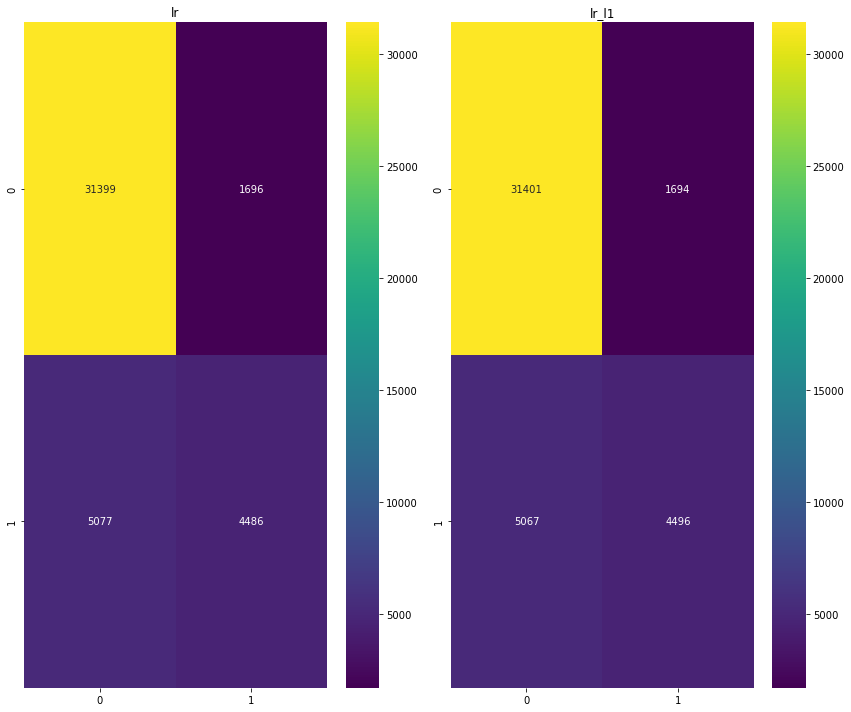

In [54]:
fig, axList = plt.subplots(nrows=1, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

#axList[-2].axis('off')

for ax,lab in zip(axList, label):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap='viridis');
    ax.set(title=lab);
    
plt.tight_layout()
plt.savefig("CM_ALL_LR.png",dpi=80)
### END SOLUTION

__the best model is obtained with logistic regression lr_l1__

# KNN CLASSIFIER
* The dataset is very long, it will not be of good use since it will consume a lot of memory  if we look a best value of K ,and it will take a long time to execute since it needs to do a lot of distance calculation

In [86]:

f1_scores = list()
#error_rates = list() # 1-accuracy

    
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
    
y_pred = knn.predict(X_test)

    #precision=precision_score(y_pred, y_test)


accuracy=round(accuracy_score(y_test, y_pred), 4)

  
  
    #error = 1-round(accuracy_score(y_test, y_pred), 4)
   # accuracy= error = round(accuracy_score(y_test, y_pred), 4)
    #error_rates.append((k, error))
f1_scores.append(pd.Series({ 'accuracy':accuracy}, name=knn))
   
#f1_results = pd.DataFrame(f1_scores, columns=['F1 Score','precision','accuracy'])
#error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

In [87]:
f1_scores

[accuracy    0.8301
 Name: KNeighborsClassifier(weights='distance'), dtype: float64]

In [89]:
cm2=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

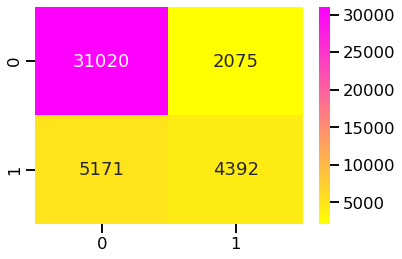

In [169]:
sns.heatmap(cm2,annot=True, fmt='d',cmap='spring_r')
plt.savefig("CM_knn.png",dpi=80)

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     33095
           1       0.68      0.46      0.55      9563

    accuracy                           0.83     42658
   macro avg       0.77      0.70      0.72     42658
weighted avg       0.82      0.83      0.82     42658



__Knn does not present good results against logistic regression, which may be due to outliers__

# Train dataset with SUPPORT VECTOR MACHINE

* many rows >100k and few features the good model to choise is Linearsvc or kernel_approximation

In [153]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

kwargs = {'kernel': 'rbf'}
lsvc = LinearSVC(penalty='l2')
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [154]:
lsvc.fit(X_train,y_train)
pred_lsvc=lsvc.predict(X_test)
acuracy= accuracy_score(y_test,pred_lsvc)
accuracy

0.8301

In [156]:
print("Clasification report LinearSVC: ")
print("")
print(classification_report(y_test,pred_lsvc))

Clasification report LinearSVC: 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33095
           1       0.74      0.44      0.55      9563

    accuracy                           0.84     42658
   macro avg       0.80      0.70      0.73     42658
weighted avg       0.83      0.84      0.82     42658



Text(0.5, 1.0, 'LinearSVC')

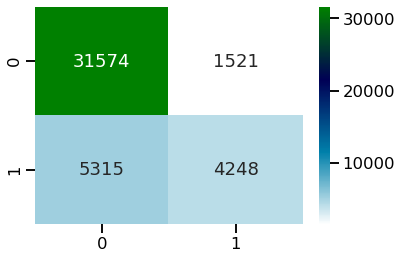

In [166]:

cm3=confusion_matrix(y_test,pred_lsvc)
sns.heatmap(cm3,annot=True, fmt='d',cmap='ocean_r')
ax.set_title('LinearSVC', fontsize=20)

In [157]:
X_train_transformed = nystroem.fit_transform(X_train)
X_test_tranformed= nystroem.transform(X_test)
sgd.fit(X_train_transformed,y_train)

SGDClassifier()

In [159]:
pred1=sgd.predict(X_test_tranformed)
score=accuracy_score(y_test,pred1)

In [160]:
score

0.8374044727835341

In [162]:
print("Clasification report sgdclassifier")
print("")
print(classification_report(y_test,pred1))

Clasification report sgdclassifier

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     33095
           1       0.79      0.38      0.51      9563

    accuracy                           0.84     42658
   macro avg       0.82      0.67      0.71     42658
weighted avg       0.83      0.84      0.81     42658



Text(0.5, 1.0, 'sgbclassifier')

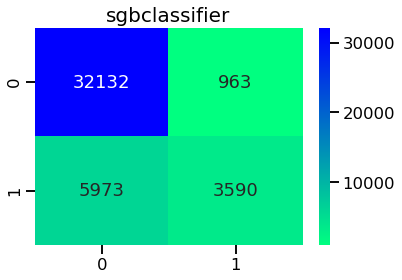

In [170]:
sns.set_context('talk')
cm4 = confusion_matrix(y_test, pred1)
ax = sns.heatmap(cm4, annot=True, fmt='d',cmap='winter_r')
ax.set_title('sgbclassifier', fontsize=20)

# GradientBoostingClassifier

* as we know that GradientBoostingClassifier is more robust to outliers, let's see how it behaves
* without hyperparameters default 
* with hyperparameters

In [100]:
score_list = list()

# Iterate through various possibilities for number of trees
tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred_gbc = GBC.predict(X_test)

    # Get the error
    acuracy= accuracy_score(y_test, y_pred_gbc)
    
    # Store it
    score_list.append(pd.Series({'n_trees': n_trees, 'accuracy': acuracy}))

score_df = pd.concat(score_list, axis=1).T.set_index('n_trees')

score_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


,accuracy
n_trees,
15.0,0.834826
25.0,0.841952
50.0,0.845047
100.0,0.848727
200.0,0.850462
400.0,0.853486


In [103]:
score_df.loc[200][0]

0.8504618125556753

In [104]:
import json
with open("metricsgbc.json", 'w') as outfile:
        json.dump({'accuracy':score_df.loc[200][0]}, outfile)

From 200 trees it begins to stabilize the accuracy . can as we see we increase the accuracy  

- Using a grid search with cross-validation,  we fit a new gradient boosted classifier with the same list of estimators as previous.learning rates (0.1, 0.01, 0.001, etc.), the subsampling value (1.0 or 0.5), and the number of maximum features (1, 2, etc.).
- it takes a long time to run

In [105]:
from sklearn.model_selection import GridSearchCV
tree_list2 = [200,300, 400]
# The parameters to be fit
param_grid = {'n_estimators': tree_list2,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [106]:
GV_GBC.best_score_

0.8512282111819964

In [107]:
import json
with open("metrics_GBC_GRID.json", 'w') as outfile:
        json.dump({'accuracy':GV_GBC.best_score_}, outfile)

In [108]:
GV_GBC.best_params_

{'learning_rate': 0.1,
 'max_features': 4,
 'n_estimators': 400,
 'subsample': 1.0}

In [109]:
final_model=GV_GBC.best_estimator_

In [110]:
import pickle
pkl_filename='GBC_GRIDCV.pkl'
with open(pkl_filename,'wb') as file:
    pickle.dump(final_model,file)

In [111]:
y_pred_cv=final_model.predict(X_test)
print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     33095
           1       0.75      0.51      0.60      9563

    accuracy                           0.85     42658
   macro avg       0.81      0.73      0.76     42658
weighted avg       0.84      0.85      0.84     42658



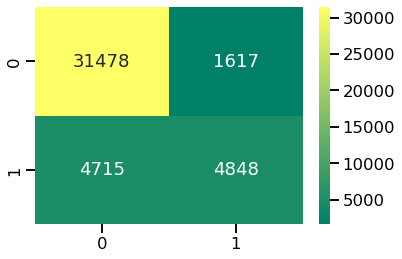

In [112]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_cv)
ax = sns.heatmap(cm, annot=True, fmt='d',cmap='summer')
plt.savefig('CM_GBC_GRIDCV',dpi=80)
### END SOLUTION

## I recommend using GradientBoostingClassifier because it presents better results and can be tuned,has an accuracy of almost 86% an average precision of 84% and f1_score of 84%

# Recap next step

- ### Despite the good results achieved, with the chosen model it is seen that it is difficult to predict RainTomorrow = 1 since the class is unbalanced. We can resort to oversampling or downsampling technique to balance the data and then re-predict the results.

# Synthetic Minority Oversampling Technique
- !pip install imbalanced-learn
- data augmentation

In [125]:
!pip install -U imbalanced-learn

In [127]:
pip install --upgrade sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=2bea814dda7fa7ba1705fa68afd73b21d3fe822eb775def1aeffc126c7befa49
  Stored in directory: c:\users\loli\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [1]:
from imblearn.over_sampling import SMOTE


In [4]:
data=pd.read_csv('clean_Rain_austrialia.csv')

In [8]:
feature_cols =  [x for x in data.columns  if  x not in 'RainTomorrow']

In [9]:
X=data[feature_cols]
Y=data['RainTomorrow']

In [10]:
Y.value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [11]:
X.shape

(142193, 16)

In [12]:
import collections as co

print(co.Counter(Y))


# Strategie oversampling
oversample = SMOTE(sampling_strategy='auto')
# Adjust and apply transformation
X_over, y_over = oversample.fit_resample(X, Y)
# Results
print(co.Counter(y_over))


Counter({0: 110316, 1: 31877})
Counter({0: 110316, 1: 110316})


In [13]:
print(y_over.shape,X_over.shape)
#X_over.shape
#X_over.shape

(220632,) (220632, 16)


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(X_over,y_over,test_size=0.33,random_state=7)


GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42,
                           subsample=0.5)

In [16]:
import pickle
GB = pickle.load(open('GBC_GRIDCV.pkl','rb'))


In [17]:
#GB=GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42, subsample=0.5)
GB.fit(x_train,Y_train)
pred= GB.predict(x_test)
print(f"accuracy: {accuracy_score(Y_test,pred)}")
print(f"confusion matrix  : {confusion_matrix(Y_test,pred)}")
print(f"clasification report {classification_report(Y_test,pred)}")

accuracy: 0.8900822700490324
confusion matrix  : [[33099  3143]
 [ 4860 31707]]
clasification report               precision    recall  f1-score   support

           0       0.87      0.91      0.89     36242
           1       0.91      0.87      0.89     36567

    accuracy                           0.89     72809
   macro avg       0.89      0.89      0.89     72809
weighted avg       0.89      0.89      0.89     72809



In [20]:
import json
with open("metrics_GBC_oversample.json", 'w') as outfile:
        json.dump({'accuracy':GB.best_score_}, outfile)

AttributeError: 'GradientBoostingClassifier' object has no attribute 'best_score_'

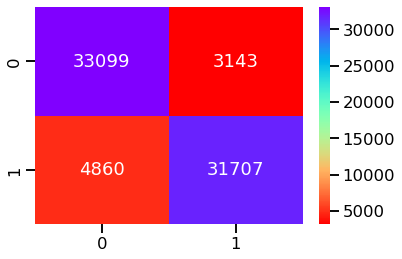

In [19]:
sns.set_context('talk')
cm = confusion_matrix(Y_test, pred)
ax = sns.heatmap(cm, annot=True, fmt='d',cmap='rainbow_r')
plt.savefig('GBC_OVERSAMPLE',dpi=80)

## as you can see we have greatly improved our balanced model the data

       